# Multi Layer Percepron (MLP) with Scikit Learn

## Libraries

In [26]:
from sklearn.metrics import classification_report
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

## MLP

<div class="alert alert-block alert-info">
    
The **multi layer perceptron (MLP)** is feedforward neural network composed of successive layers (cf. Figure below).

<img src="files/figures/MLP.jpg" width="600px"/>
 
The dynamics of an MLP is given by the following equations (sample and batch versions):

$$
\begin{array}{ll}
\textbf{sample $\boldsymbol{x}$} & \textbf{batch $\boldsymbol{X_i}$} \\
\begin{cases}
\boldsymbol{a^{[0]}} ~=~ \boldsymbol{x} & \\
\boldsymbol{z^{[l]}} ~=~ \boldsymbol{W^{[l]}} \boldsymbol{a^{[l-1]}} + \boldsymbol{b^{[l]}}, & l = 1, \dots, L \\
\boldsymbol{a^{[l]}} ~=~ \boldsymbol{\sigma} \left( \boldsymbol{z^{[l]}} \right), & l = 1, \dots, L
\end{cases}
~&~
\begin{cases}
\boldsymbol{A^{[0]}} ~=~ \boldsymbol{X_i}	\\
\boldsymbol{Z^{[l]}} ~=~ \boldsymbol{W^{[l]}} \boldsymbol{A^{[l-1]}} \oplus \boldsymbol{b^{[l]}}, & l = 1, \dots, L \\
\boldsymbol{A^{[l]}} ~=~ \boldsymbol{\sigma} \big( \boldsymbol{Z^{[l]}} \big), & l = 1, \dots, L
\end{cases}
\end{array}
$$

</div>

At this point, we still don't know how to train a neural network properly.<br>
But we will use the `sklearn` library that does this for us...

The **MNIST dataset** consists of handwritten digits. The MNIST classification problem consists in predicting the correct digit represented on an image.

<img src="files/figures/mnist.png" width="600px"/>

- Load the MNIST dataset from from https://www.openml.org/d/554 using the following commands:

```
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
X = X / 255.0  # rescale pixel values {0,...,255} -> [0, 1]
```

- Split data into train and test sets (80% train/ 20% test)^

In [3]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
X = X / 255.0  # rescale pixel values {0,...,255} -> [0, 1]

In [12]:
X.shape, y.shape

((70000, 784), (70000,))

In [13]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=42, 
                                                    test_size=0.8)

- Define a **multi-layer perceptron (MLP)** with the following parameters:
    - 2 hidden layers of size 128 neurons<br>
    `hidden_layer_sizes = (128, 128)`
    - 40 epochs<br>
    `max_iter = 40`
    - as the solver, use a stochastic gradient descent (SGD)<br>
    `solver = "sgd"`
- Train your model on the train set.
- Get the scores of your model the train and test sets.
- Get the test predictions and labels and compute the classification report.

    Check the documentation:<br>
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

In [20]:
mlp = MLPClassifier(
    hidden_layer_sizes = (128, 128),
    batch_size = 64,
    max_iter = 40,
    solver = "sgd"
)

In [21]:
mlp.fit(X_train, y_train)

MLPClassifier(batch_size=64, hidden_layer_sizes=(128, 128), max_iter=40)

In [22]:
mlp.score(X_train, y_train)

1.0

In [23]:
mlp.score(X_test, y_test)

0.9659464285714285

In [27]:
test_preds = mlp.predict(X_test)
test_preds.shape

(56000,)

In [28]:
print(classification_report(y_test, test_preds, digits=3))

              precision    recall  f1-score   support

           0      0.977     0.985     0.981      5528
           1      0.979     0.982     0.980      6264
           2      0.962     0.966     0.964      5576
           3      0.965     0.951     0.958      5727
           4      0.964     0.967     0.965      5460
           5      0.955     0.959     0.957      5048
           6      0.973     0.976     0.974      5516
           7      0.967     0.968     0.967      5864
           8      0.957     0.950     0.954      5450
           9      0.958     0.954     0.956      5567

    accuracy                          0.966     56000
   macro avg      0.966     0.966     0.966     56000
weighted avg      0.966     0.966     0.966     56000



**I'm very surprised by the training speed... Results are excellent!**

- Using `plt.matshow()`, visualize the weights of each layer of your model.
- **Note:** the weight of layer `i` is a numpy arrax given by `your_model.coefs_[0]`.

In [61]:
mlp.coefs_[0].shape, mlp.coefs_[1].shape, mlp.coefs_[2].shape

((784, 128), (128, 128), (128, 10))

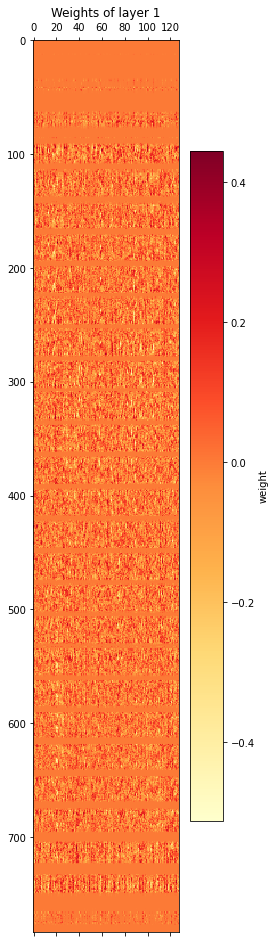

In [62]:
# weights of layer 1
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()

plt.matshow(mlp.coefs_[0], cmap="YlOrRd", vmin=vmin, vmax=vmax)
plt.colorbar(label="weight", orientation="vertical")
plt.title("Weights of layer 1")
plt.show()

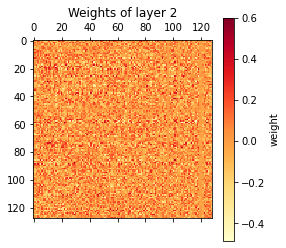

In [63]:
# weights of layer 2
vmin, vmax = mlp.coefs_[1].min(), mlp.coefs_[1].max()

plt.matshow(mlp.coefs_[1], cmap="YlOrRd", vmin=vmin, vmax=vmax)
plt.colorbar(label="weight", orientation="vertical")
plt.title("Weights of layer 2")
plt.show()

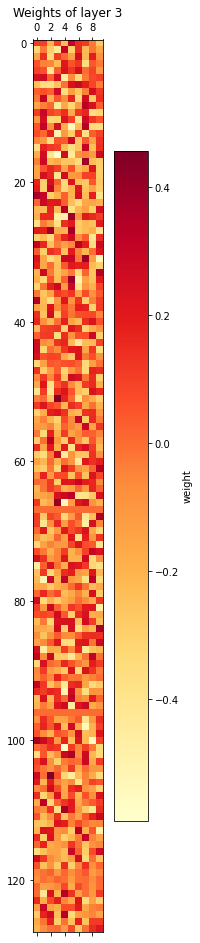

In [64]:
# weights of layer 3
vmin, vmax = mlp.coefs_[2].min(), mlp.coefs_[2].max()

plt.matshow(mlp.coefs_[2], cmap="YlOrRd", vmin=vmin, vmax=vmax)
plt.colorbar(label="weight", orientation="vertical")
plt.title("Weights of layer 3")
plt.show()